In [1]:
import os

In [2]:
!pip install ultralytics supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
!nvidia-smi

Mon Dec  2 15:19:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [7]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n-seg.pt')
image = Image.open("130.jpg")
result = model.predict(image, conf=0.25)[0]


0: 384x640 11 cars, 76.6ms
Speed: 20.8ms preprocess, 76.6ms inference, 812.0ms postprocess per image at shape (1, 3, 384, 640)


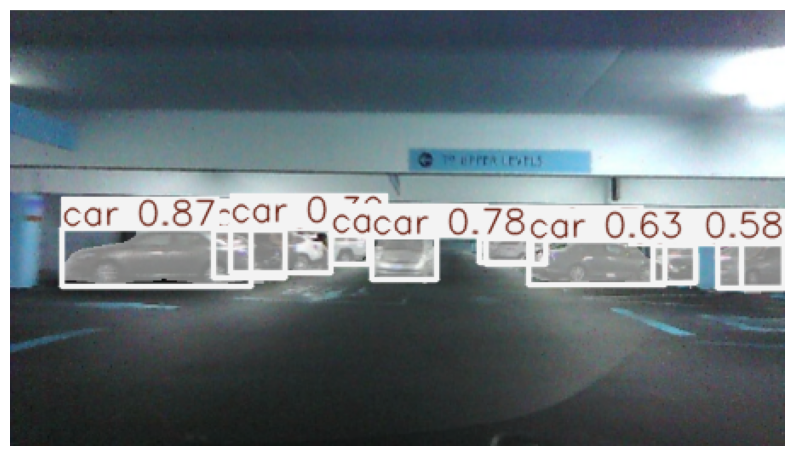

In [10]:
import matplotlib.pyplot as plt
result_image = result.plot()

plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.axis('off')
plt.show()

In [11]:
model = YOLO('yolo11n-seg.pt')
image = Image.open("/content/38742.jpg")
result = model.predict(image, conf=0.25)[0]


0: 384x640 3 cars, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


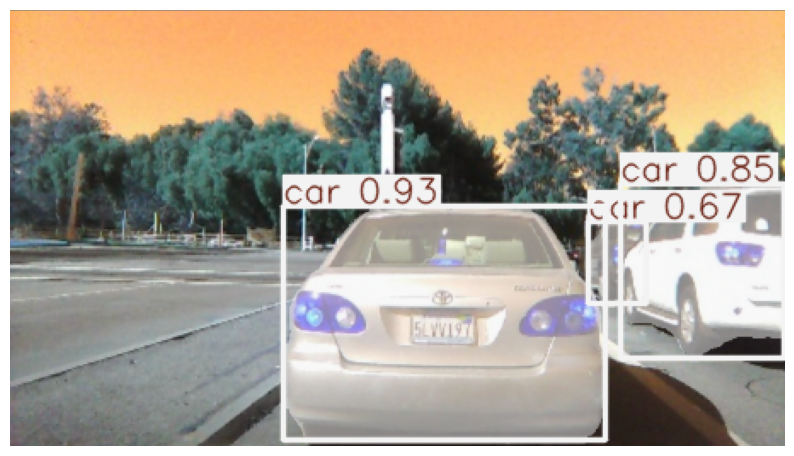

In [12]:
import matplotlib.pyplot as plt
result_image = result.plot()

plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.axis('off')
plt.show()

In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QUWMCW70c1dPy9pc03sQ")
project = rf.workspace("aditya-choudhary-ehv9p").project("l-s-kvbur")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to L-S-1 in yolov11:: 100%|██████████| 2050/2050 [00:00<00:00, 3613.32it/s]


In [14]:
dataset.location

'/content/L-S-1'

In [15]:
!yolo task = segment mode = train model = yolo11m-seg.pt data={dataset.location}/data.yaml epochs = 20 imgsz = 640 plots = True

100% 43.3M/43.3M [00:01<00:00, 24.0MB/s]
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=/content/L-S-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

In [16]:
!yolo segment predict model=yolo11n-seg.pt source='/content/5.jpg'

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,868,664 parameters, 0 gradients, 10.4 GFLOPs

image 1/1 /content/5.jpg: 384x640 7 cars, 94.3ms
Speed: 3.7ms preprocess, 94.3ms inference, 670.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [24]:
!yolo segment predict model=/content/runs/segment/train/weights/best.pt source='/content/5.jpg'

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m-seg summary (fused): 330 layers, 22,336,854 parameters, 0 gradients, 123.0 GFLOPs

image 1/1 /content/5.jpg: 384x640 1 lane1, 1 lane2, 76.9ms
Speed: 3.1ms preprocess, 76.9ms inference, 573.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


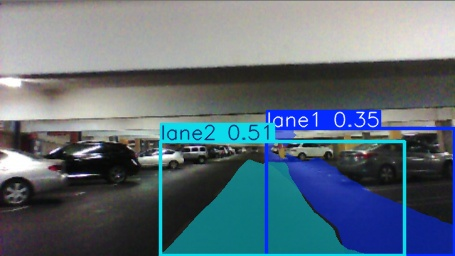

In [26]:
Image.open("/content/runs/segment/predict3/5.jpg")

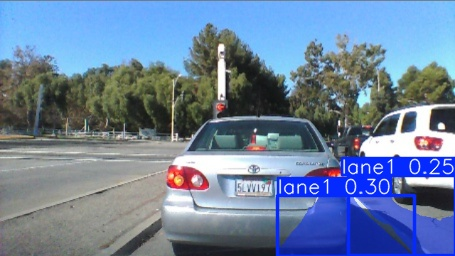

In [27]:
Image.open("/content/runs/segment/predict2/38742.jpg")

In [28]:
!yolo segment predict model=/content/runs/segment/train/weights/best.pt source='/content/lane_vidf.mp4'

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m-seg summary (fused): 330 layers, 22,336,854 parameters, 0 gradients, 123.0 GFLOPs

video 1/1 (frame 1/723) /content/lane_vidf.mp4: 384x640 1 lane2, 71.1ms
video 1/1 (frame 2/723) /content/lane_vidf.mp4: 384x640 1 lane2, 31.3ms
video 1/1 (frame 3/723) /content/lane_vidf.mp4: 384x640 1 lane2, 31.2ms
video 1/1 (frame 4/723) /content/lane_vidf.mp4: 384x640 1 lane2, 31.2ms
video 1/1 (frame 5/723) /content/lane_vidf.mp4: 384x640 1 lane2, 31.2ms
video 1/1 (frame 6/723) /content/lane_vidf.mp4: 384x640 1 lane1, 1 lane2, 27.9ms
video 1/1 (frame 7/723) /content/lane_vidf.mp4: 384x640 1 lane1, 1 lane2, 18.7ms
video 1/1 (frame 8/723) /content/lane_vidf.mp4: 384x640 1 lane2, 18.8ms
video 1/1 (frame 9/723) /content/lane_vidf.mp4: 384x640 1 lane2, 18.7ms
video 1/1 (frame 10/723) /content/lane_vidf.mp4: 384x640 1 lane2, 18.5ms
video 1/1 (frame 11/723) /content/lane_vidf.mp4: 384x640 1 lane2, 18.5ms
video 1/1 (fram

In [29]:
from IPython.display import Video

Video("/content/runs/segment/predict4/lane_vidf.avi")